# Signal and Event Analysis

In this part we show basic analysis of the DAS waveforms.

## Phase Following

Follow a coherent phase through a DAS section.

We can laverage the spatial coherency of a DAS data set and follow the onset of a phase through iterative cross-correlation of neighboring traces. The principle workflow is:

1. Get windowed root pick template.
2. Calculate normalized cross correlate with downwards neighbor.
3. Evaluate maximum x-correlation in allowed window (max_shift).
4. Update template trace and go to 2.

5. Repeat for upward neighbors.
6. Profit.

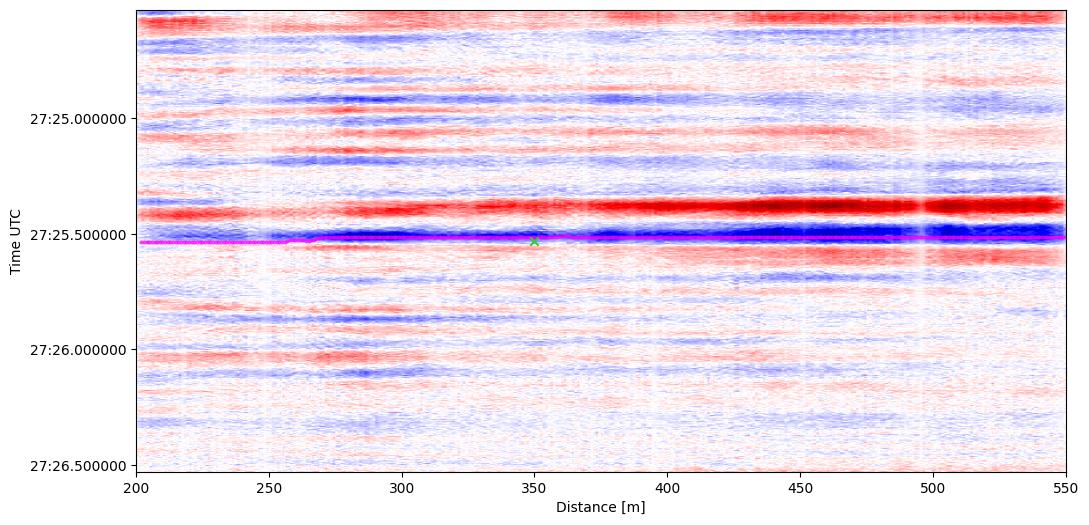

In [4]:
%config InlineBackend.figure_format = 'jpg'
import matplotlib.pyplot as plt
from datetime import timedelta
from lightguide.client import ExampleData


# This will download example data
blast = ExampleData.earthquake()

blast = blast.trim_channels(begin=200, end=550)

blast.afk_filter()
# blast.lowpass(5.0)

pick_time = blast.start_time + timedelta(seconds=17.34)
pick_channel = 350

# Follow the phase from initial pick
pick_channels, pick_times, pick_correlation = blast.follow_phase(
    pick_time,
    pick_channel,
    threshold=1e-1,
)

fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

blast.plot(axes=ax, show_date=True)
ax.scatter(pick_channels, pick_times, s=4, c="fuchsia", alpha=0.6)

# Plot initial pick
ax.scatter(pick_channel, pick_time, marker="x", c="limegreen")
ax.set_ylim(pick_time - timedelta(seconds=-1), pick_time - timedelta(seconds=1));